# TRTR and TSTR Results Comparison

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('precision', 4)

## 1. Create empty dataset to save metrics differences

In [2]:
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
ml_models = ['RF','KNN','DT','SVM','MLP']

## 2. Read obtained results when TRTR and TSTR

In [3]:
FILEPATHS = {'Real' : 'RESULTS/models_results_real.csv',
            'GM' : 'RESULTS/models_results_gm.csv',
            'SDV' : 'RESULTS/models_results_sdv.csv',
            'CTGAN' : 'RESULTS/models_results_ctgan.csv',
            'WGANGP' : 'RESULTS/models_results_wgangp.csv'}

In [6]:
#iterate over all datasets filepaths and read each dataset
results_all = dict()
for name, path in FILEPATHS.items() :
    results_all[name] = pd.read_csv(path, index_col='model')
results_all

{'Real':        accuracy  precision  recall      f1
 model                                     
 RF       0.5288     0.5226  0.5288  0.5232
 KNN      0.5186     0.5240  0.5186  0.5173
 DT       0.5051     0.5022  0.5051  0.5031
 SVM      0.3763     0.3499  0.3763  0.3568
 MLP      0.5322     0.5220  0.5322  0.5241,
 'GM':        accuracy  precision  recall      f1
 model                                     
 RF       0.4339     0.4401  0.4339  0.4321
 KNN      0.4576     0.4581  0.4576  0.4536
 DT       0.3763     0.3796  0.3763  0.3757
 SVM      0.3797     0.3681  0.3797  0.3674
 MLP      0.4068     0.4194  0.4068  0.4114,
 'SDV':        accuracy  precision  recall      f1
 model                                     
 RF       0.3627     0.4165  0.3627  0.3433
 KNN      0.3356     0.2998  0.3356  0.2800
 DT       0.3627     0.3615  0.3627  0.3477
 SVM      0.4881     0.4577  0.4881  0.4366
 MLP      0.3729     0.4035  0.3729  0.3538,
 'CTGAN':        accuracy  precision  recall      f1

## 3. Calculate differences of models

In [7]:
metrics_diffs_all = dict()
real_metrics = results_all['Real']
columns = ['data','accuracy_diff','precision_diff','recall_diff','f1_diff']
metrics = ['accuracy','precision','recall','f1']

for name in SYNTHESIZERS :
    syn_metrics = results_all[name]
    metrics_diffs_all[name] = pd.DataFrame(columns = columns)
    for model in ml_models :
        real_metrics_model = real_metrics.loc[model]
        syn_metrics_model = syn_metrics.loc[model]
        data = [model]
        for m in metrics :
            data.append(abs(real_metrics_model[m] - syn_metrics_model[m]))
        metrics_diffs_all[name] = metrics_diffs_all[name].append(pd.DataFrame([data], columns = columns))
metrics_diffs_all

{'GM':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0949          0.0825       0.0949   0.0911
 0  KNN         0.0610          0.0659       0.0610   0.0637
 0   DT         0.1288          0.1226       0.1288   0.1274
 0  SVM         0.0034          0.0182       0.0034   0.0106
 0  MLP         0.1254          0.1026       0.1254   0.1127,
 'SDV':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.1661          0.1061       0.1661   0.1799
 0  KNN         0.1830          0.2242       0.1830   0.2373
 0   DT         0.1424          0.1407       0.1424   0.1554
 0  SVM         0.1118          0.1078       0.1118   0.0798
 0  MLP         0.1593          0.1185       0.1593   0.1703,
 'CTGAN':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.1152          0.1108       0.1152   0.1112
 0  KNN         0.1457          0.1643       0.1457   0.1578
 0   DT         0.1627          0.1480       0.1627   0.1567


## 4. Compare absolute differences

### 4.1. Barplots for each metric

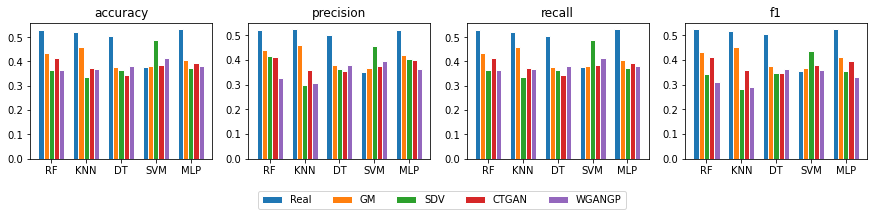

In [9]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
metrics_diff = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

barwidth = 0.15

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 2.5))
axs_idxs = range(4)
idx = dict(zip(metrics + metrics_diff,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    y_pos = dict()
    y_pos[0] = np.arange(len(ml_models))
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(DATA_TYPES)) :
        generator_data = results_all[DATA_TYPES[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.bar(y_pos[k], data[k], color=colors[k], width=barwidth, edgecolor='white', label=DATA_TYPES[k])
        y_pos[k+1] = [x + barwidth for x in y_pos[k]]
        
    ax.set_xticks([r + barwidth*2 for r in range(len(ml_models))])
    ax.set_xticklabels([])
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    
ax.legend(DATA_TYPES, ncol=5, bbox_to_anchor=(-0.3, -0.2))
fig.tight_layout()
#fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset F - Indian Liver Patient', fontsize=18)
fig.savefig('RESULTS/MODELS_METRICS_BARPLOTS.svg', bbox_inches='tight')

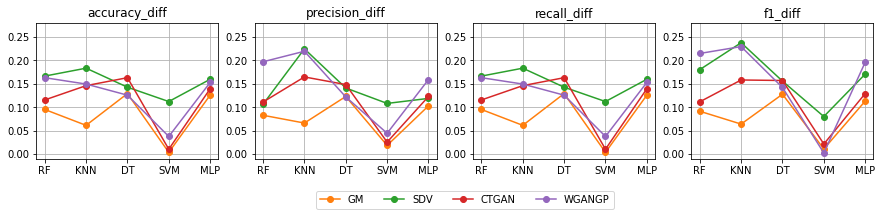

In [10]:
metrics = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,2.5))
axs_idxs = range(4)
idx = dict(zip(metrics,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(SYNTHESIZERS)) :
        generator_data = metrics_diffs_all[SYNTHESIZERS[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.plot(data[k], 'o-', color=colors[k], label=SYNTHESIZERS[k])
        
    ax.set_xticks(np.arange(len(ml_models)))
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    ax.set_ylim(bottom=-0.01, top=0.28)
    ax.grid()
    
ax.legend(SYNTHESIZERS, ncol=5, bbox_to_anchor=(-0.4, -0.2))
fig.tight_layout()
#fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset F - Indian Liver Patient', fontsize=18)
fig.savefig('RESULTS/MODELS_METRICS_DIFFERENCES.svg', bbox_inches='tight')